#WEEK 3 EDA for Google Apps Review
irma@its.ac.id/ PBA 2025

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Define file path
file_path = "data\df_gjkrev.csv"

# Read the Excel file (only if the file exists)
df_gjkrev = pd.read_csv(file_path)

# Display the first few rows
df_gjkrev.head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21492\939721614.py:4: SyntaxWarning: invalid escape sequence '\d'
  file_path = "data\df_gjkrev.csv"
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21492\939721614.py:7: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gjkrev = pd.read_csv(file_path)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f644ad88-c526-44fa-9cfe-483e9a6351f7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,kendaraan nyaman dan tepat waktu,5,0,5.31.2,2025-09-15 11:16:10,NaN,NaN,5.31.2
1,4a346c2b-fd75-4b33-a71e-312a3aeda45d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,very reliable for my daily life,5,0,5.31.2,2025-09-15 11:15:55,NaN,NaN,5.31.2
2,635b1a72-49b7-429f-9f68-7ac7f2baa288,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Driver sering minta batal tapi harus kita yang...,2,0,NaN,2025-09-15 11:10:47,"Hai Kak Ria, mohon maaf atas ketidaknyamananny...",2025-09-15 15:18:16,NaN
3,17f8983e-b736-403d-8aac-8511b8c991ed,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa driver bisa liat rating tapi kita sendi...,3,0,5.30.1,2025-09-15 10:46:38,"Hai Kak Rizky, mohon maaf atas ketidaknyamanan...",2025-09-15 15:17:14,5.30.1
4,5a5dcc32-f002-4b11-9ade-54331ede5fcd,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,awesome,5,0,5.31.2,2025-09-15 07:45:22,NaN,NaN,5.31.2


# Exploratory Data Analysis (EDA) of Gojek Reviews

## 1. Install Necessary Packages
This section ensures that all required Python packages are installed before running the notebook.

In [5]:
!pip install pandas matplotlib seaborn nltk -q

## 2. Import Required Libraries
We import essential libraries for data analysis, visualization, and text processing.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import string

## 3. Download Stopwords
Downloading the Indonesian stopwords from NLTK for text processing.

In [ ]:
!pip install Sastrawi

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


# Create stemmer and lemmatizer objects
factory = StemmerFactory()
stemmer = factory.create_stemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Check if the input is a string, if not, convert to empty string
    if not isinstance(text, str):
        text = ""

    # Case lowering
    text = text.lower()

    # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Stemming
    text = stemmer.stem(text)

    # Lemmatization (requires a part-of-speech tag for optimal results, using 'v' for verb as a default)
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, 'v') for word in words]
    text = ' '.join(lemmatized_words)

    return text

# Apply the cleaning function to the 'content' column
df_gjkrev['cleaned_review'] = df_gjkrev['content'].apply(clean_text)

# Display the DataFrame with the cleaned reviews
print(df_gjkrev[['content', 'cleaned_review']])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 5. Data Overview
This section provides basic dataset information, including column names, data types, and the first few records.

In [ ]:
# Convert 'at' column to datetime format
df_gjkrev['at'] = pd.to_datetime(df_gjkrev['at'])

# Display dataset info and first few rows
df_gjkrev.info()
df_gjkrev.head()

## 6. Missing Values Analysis
Identifies and counts missing values in each column.

In [ ]:
missing_values = df_gjkrev.isnull().sum()
print("Missing Values Summary:")
print(missing_values)

## 7. Review Score Distribution
Visualizing the distribution of review scores to understand user sentiments.

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_21492\626075893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_gjkrev['score'], palette="viridis")


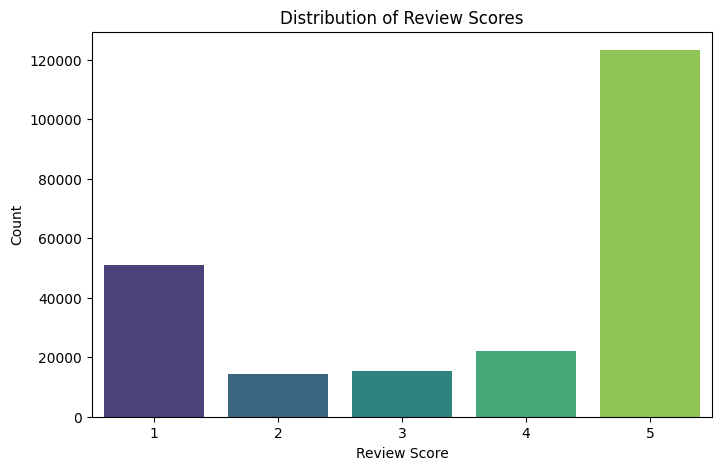

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x=df_gjkrev['score'], palette="viridis")
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

## 8. Review Trends Over Time
Analyzing how the number of reviews changes over time to detect patterns.

In [ ]:
df_gjkrev['review_date'] = df_gjkrev['at'].dt.date
review_trend = df_gjkrev.groupby('review_date').size()

plt.figure(figsize=(12, 6))
review_trend.plot()
plt.title("Daily Review Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

## 9. Word Frequency Analysis
Analyzing common words in reviews, excluding Indonesian stopwords.

In [ ]:
stop_words = set(stopwords.words('indonesian'))

# Combine all review text
all_reviews = " ".join(df_gjkrev['content'].dropna()).lower()
all_reviews = all_reviews.translate(str.maketrans("", "", string.punctuation))

# Tokenization and filtering words
words = all_reviews.split()
filtered_words = [word for word in words if word not in stop_words]

# Counting word occurrences
word_counts = Counter(filtered_words)
common_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

# Display most common words
print("Most Common Words in Reviews:")
print(common_words)
